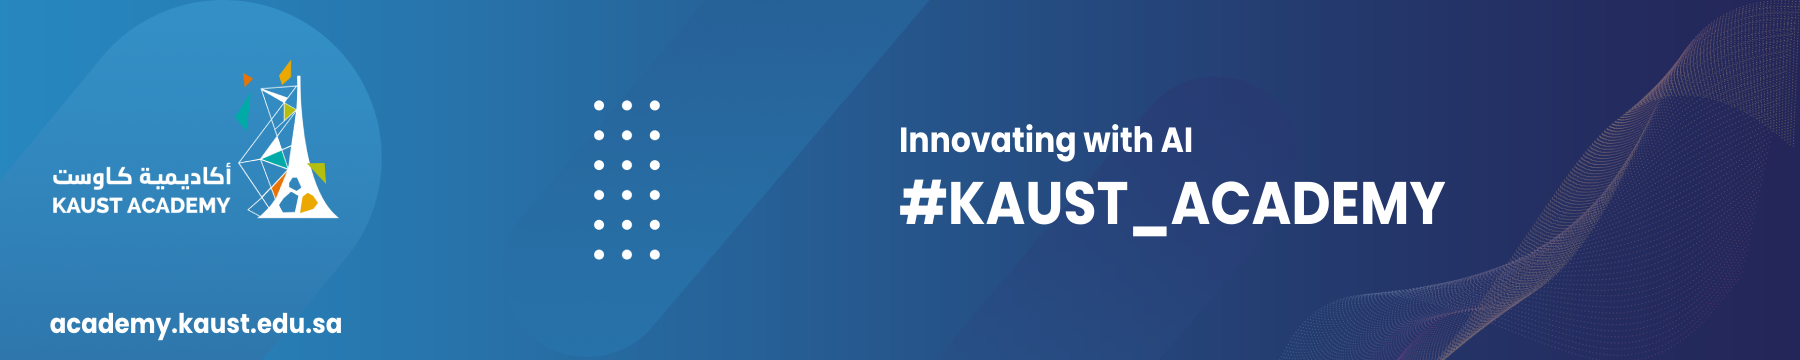

# 📌 Parameter-Efficient Fine-Tuning (PEFT): Motivation, Methods, and Limitations


**Why Parameter-Efficient Fine-Tuning (PEFT)?**

Training and adapting large language models (LLMs) like LLaMA, GPT, or Gemma to specific tasks via full fine-tuning is becoming increasingly impractical due to the following reasons:

---

### ⚠️ Challenges with Full Fine-Tuning

- **💻 Resource Intensive**  
  Requires GPUs with massive memory (often >80–100GB) and powerful infrastructure.

- **📦 Storage Overhead**  
  Each task-specific model checkpoint can be tens or hundreds of GBs.

- **⏱️ Slow Training Time**  
  Fine-tuning billions of parameters is time-consuming and computationally expensive.
---

**Parameter-Efficient Fine-Tuning (PEFT)** addresses these issues by training only a **small, targeted subset of parameters**, while keeping the base model **frozen**. Common approaches include LoRA, QLoRA, Prompt Tuning, and Adapter layers.

---


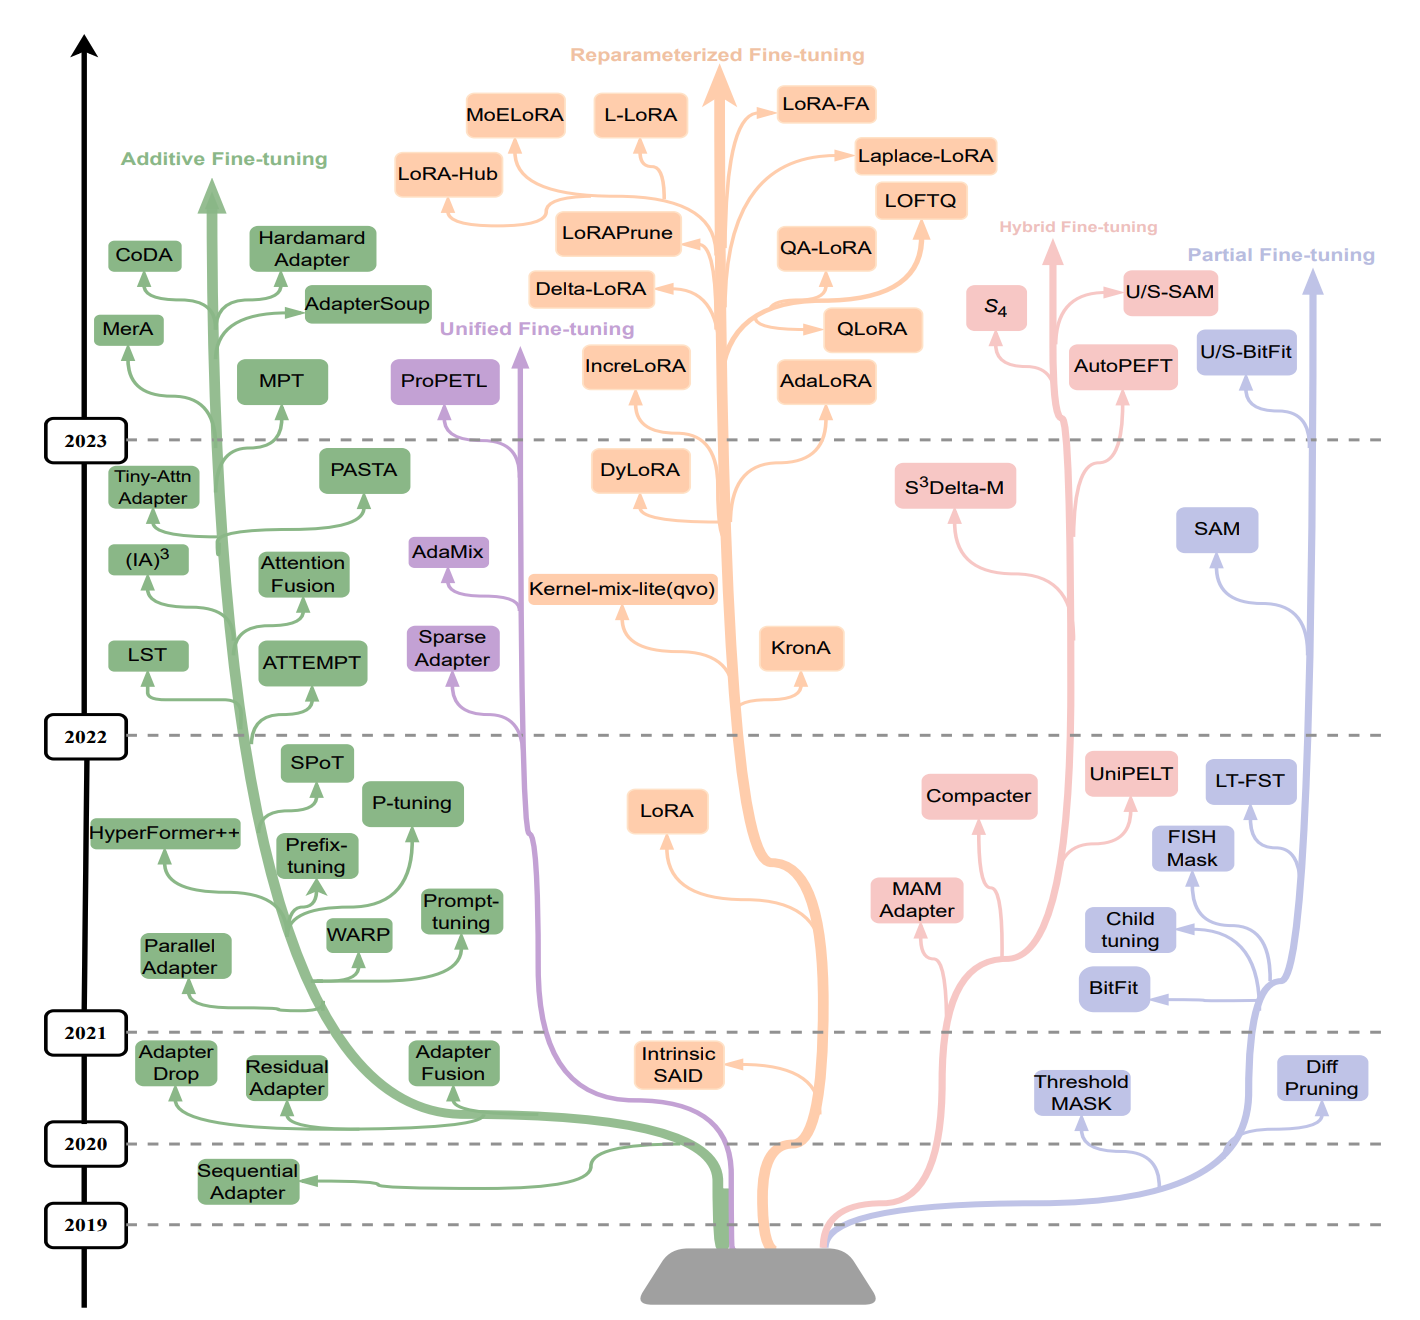
[“Parameter-Efficient Fine-Tuning Methods for Pretrained Language Models: A Critical Review and Assessment” by Xu et al.](https://https://arxiv.org/pdf/2312.12148)

# 🧠 Most Common PEFT Techniques — What to Use and When?

Parameter-Efficient Fine-Tuning (PEFT) methods let you adapt powerful LLMs without updating all their weights. Here are the top techniques you should know:

---

## 📊 Summary Table: Top 3 PEFT Techniques

| 🛠️ Technique      | 💡 Key Idea                                      | 🎯 Tunable Params | 🧊 Base Model           | 📚 Used In           |
|------------------|--------------------------------------------------|-------------------|-------------------------|----------------------|
| **Prompt Tuning**| Learn prompt embeddings (soft prompts)           | 🔹 Very Low        | 🔹 Frozen               | T5, GPT              |
| **LoRA**         | Inject low-rank matrices in attention layers     | 🔹 Low             | 🔹 Frozen               | Alpaca, Vicuna       |
| **QLoRA**        | LoRA + quantize model to 4-bit (memory-efficient)| 🔹 Low             | 🔹 Frozen + Quantized   | Guanaco, Hermes      |

---

## 🧭 Choosing the Right PEFT Method

Follow this simple path to decide:

### 1️⃣ **Prompt Tuning**  
> 💬 *“Can I solve my task by just giving better prompts?”*  
- Try giving the model a few examples (in the prompt).
- Works great for simple or well-structured tasks.
- ✅ If results are good → **Done!**

---

### 2️⃣ **LoRA**  
> 🧠 *“Prompting wasn’t enough. I need to train a bit.”*  
- Freeze the model weights.
- Add small trainable matrices (LoRA adapters) to attention layers.
- Very efficient and fast to train.
- 🧪 Common for many instruction-tuned models.

---

### 3️⃣ **QLoRA**  
> ⚡ *“Why use a full-precision model if I’m not updating it?”*  
- Quantize the frozen model (e.g., 4-bit) to save memory.
- Still train LoRA adapters on top.
- 🚀 Same performance as LoRA but much more memory-efficient.





## What is QLoRA fine-tuning?

In the conventional fine-tuning, weight ($\mathbf{W}$) is updated as follows:

$$
\mathbf{W} \leftarrow \mathbf{W} - \eta \frac{{\partial L}}{{\partial \mathbf{W}}} = \mathbf{W} + \Delta \mathbf{W}
$$

where $L$ is a loss at this step and $\eta$ is a learning rate.

[LoRA](https://arxiv.org/abs/2106.09685) tries to approximate the $\Delta \mathbf{W} \in \mathbb{R}^{\text{d} \times \text{k}}$ by factorizing $\Delta \mathbf{W}$ into two (much) smaller matrices, $\mathbf{B} \in \mathbb{R}^{\text{d} \times \text{r}}$ and $\mathbf{A} \in \mathbb{R}^{\text{r} \times \text{k}}$ with $r \ll \text{min}(\text{d}, \text{k})$.

$$
\Delta \mathbf{W}_{s} \approx \mathbf{B} \mathbf{A}
$$

<img src="https://storage.googleapis.com/pii_data_detection/lora_diagram.png">

During training, only $\mathbf{A}$ and $\mathbf{B}$ are updated while freezing the original weights, meaning that only a fraction (e.g. <1%) of the original weights need to be updated during training. This way, we can reduce the GPU memory usage significantly during training while achieving equivalent performance to the usual (full) fine-tuning.

[QLoRA](https://arxiv.org/abs/2305.14314) pushes the efficiency further by quantizing LLM. For example, a 8B parameter model alone would take up 32GB of VRAM in 32-bit, whereas quantized 8-bit/4-bit 8B model only need 8GB/4GB respectively.
Note that QLoRA only quantize LLM's weights in low precision (e.g. 8-bit) while the computation of forward/backward are done in higher precision (e.g. 16-bit) and LoRA adapter's weights are also kept in higher precision.

1 epoch using A6000 took ~15h in 4-bit while 8-bit took ~24h and the difference in log loss was not significant.

## Note
It takes prohivitively long time to run full training on kaggle kernel. I recommend to use external compute resource to run the full training.
This notebook uses only 100 samples for demo purpose, but everything else is same as my setup.

In [ ]:
# gemma-2 is available from transformers>=4.42.3
!pip install -U "transformers>=4.42.3" bitsandbytes accelerate peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 118.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.9/503.9 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import copy
from dataclasses import dataclass

import numpy as np
import torch
from datasets import Dataset
from transformers import (
    BitsAndBytesConfig,
    Gemma2ForSequenceClassification,
    GemmaTokenizerFast,
    Gemma2Config,
    PreTrainedTokenizerBase,
    EvalPrediction,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
)
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training, TaskType
from sklearn.metrics import log_loss, accuracy_score

### Configurations

In [ ]:
@dataclass
class Config:
    output_dir: str = "output"
    checkpoint: str = "unsloth/gemma-2-9b-it-bnb-4bit"  # 4-bit quantized gemma-2-9b-instruct
    max_length: int = 1024
    n_splits: int = 5
    fold_idx: int = 0
    optim_type: str = "adamw_8bit"
    per_device_train_batch_size: int = 2
    gradient_accumulation_steps: int = 2  # global batch size is 8
    per_device_eval_batch_size: int = 8
    n_epochs: int = 1
    freeze_layers: int = 16  # there're 42 layers in total, we don't add adapters to the first 16 layers
    lr: float = 2e-4
    warmup_steps: int = 20
    lora_r: int = 16 #controls adapter size and capacity
    lora_alpha: float = lora_r * 2 #affects training stability
    lora_dropout: float = 0.05 #regularization during training
    lora_bias: str = "none" # Whether to train bias terms ("none", "all", or "lora_only")

config = Config()

#### Training Arguments

In [ ]:
training_args = TrainingArguments(
    output_dir="output",
    overwrite_output_dir=True,
    report_to="none",
    num_train_epochs=config.n_epochs,
    per_device_train_batch_size=config.per_device_train_batch_size,
    gradient_accumulation_steps=config.gradient_accumulation_steps,
    per_device_eval_batch_size=config.per_device_eval_batch_size,
    logging_steps=10,
    eval_strategy="epoch",
    save_strategy="steps",
    save_steps=200,
    optim=config.optim_type,
    fp16=True,
    learning_rate=config.lr,
    warmup_steps=config.warmup_steps,
)

#### LoRA config

In [ ]:
lora_config = LoraConfig(
    r=config.lora_r,
    lora_alpha=config.lora_alpha,
    # only target self-attention
    target_modules=["q_proj", "k_proj", "v_proj"],
    layers_to_transform=[i for i in range(42) if i >= config.freeze_layers],
    lora_dropout=config.lora_dropout,
    bias=config.lora_bias,
    task_type=TaskType.SEQ_CLS, #text classification
)

### Instantiate the tokenizer & model

In [ ]:
tokenizer = GemmaTokenizerFast.from_pretrained(config.checkpoint)
tokenizer.add_eos_token = True  # We'll add <eos> at the end
tokenizer.padding_side = "right"

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

In [ ]:
model = Gemma2ForSequenceClassification.from_pretrained(
    config.checkpoint,
    num_labels=3,
    torch_dtype=torch.float16,
    device_map="auto",
)
model.config.use_cache = False
model = prepare_model_for_kbit_training(model)
model = get_peft_model(model, lora_config)
model

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/6.13G [00:00<?, ?B/s]

Some weights of Gemma2ForSequenceClassification were not initialized from the model checkpoint at unsloth/gemma-2-9b-it-bnb-4bit and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): Gemma2ForSequenceClassification(
      (model): Gemma2Model(
        (embed_tokens): Embedding(256000, 3584, padding_idx=0)
        (layers): ModuleList(
          (0-15): 16 x Gemma2DecoderLayer(
            (self_attn): Gemma2Attention(
              (q_proj): Linear4bit(in_features=3584, out_features=4096, bias=False)
              (k_proj): Linear4bit(in_features=3584, out_features=2048, bias=False)
              (v_proj): Linear4bit(in_features=3584, out_features=2048, bias=False)
              (o_proj): Linear4bit(in_features=4096, out_features=3584, bias=False)
            )
            (mlp): Gemma2MLP(
              (gate_proj): Linear4bit(in_features=3584, out_features=14336, bias=False)
              (up_proj): Linear4bit(in_features=3584, out_features=14336, bias=False)
              (down_proj): Linear4bit(in_features=14336, out_features=3584, bias=False)
              (act_fn): PytorchGELUTanh()
 

In [ ]:
model.print_trainable_parameters()

trainable params: 7,891,456 || all params: 9,249,608,192 || trainable%: 0.0853


### Instantiate the dataset

In [ ]:
import kagglehub
import pandas as pd
# Download the dataset from Kaggle (it will give you the local path)
path = kagglehub.dataset_download("abdullahmeda/lmsys-additional-33k-labelled-conversations")
print("Downloaded to:", path)

100%|██████████| 35.3M/35.3M [00:00<00:00, 166MB/s]

Extracting files...


Downloaded to: /root/.cache/kagglehub/datasets/abdullahmeda/lmsys-additional-33k-labelled-conversations/versions/3


In [ ]:
# Read the CSV
df = pd.read_csv(f"{path}/lmsys-33k-deduplicated.csv")

# Convert to Hugging Face Dataset
ds = Dataset.from_pandas(df)

# Select first 500 rows
ds = ds.select(range(200))

print(ds)

Dataset({
    features: ['id', 'model_a', 'model_b', 'prompt', 'response_a', 'response_b', 'winner_model_a', 'winner_model_b', 'winner_tie'],
    num_rows: 200
})


###Example of how the dataset should look like

```
<prompt>: What is AI?
<response_a>: Artificial intelligence is...
<response_b>: AI is the simulation of human intelligence...
```



In [ ]:
class CustomTokenizer:
    def __init__(self, tokenizer: PreTrainedTokenizerBase, max_length: int) -> None:
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __call__(self, batch: dict) -> dict:
        # Process each text in the batch
        prompt = ["<prompt>: " + self.process_text(t) for t in batch["prompt"]]
        response_a = ["\n\n<response_a>: " + self.process_text(t) for t in batch["response_a"]]
        response_b = ["\n\n<response_b>: " + self.process_text(t) for t in batch["response_b"]]

        # Concatenate
        texts = [p + r_a + r_b for p, r_a, r_b in zip(prompt, response_a, response_b)]

        # Tokenize
        tokenized = self.tokenizer(
            texts,
            max_length=self.max_length,
            truncation=True #if exceeds max length
        )

        # Build labels
        labels = []
        for a_win, b_win in zip(batch["winner_model_a"], batch["winner_model_b"]):
            if a_win:
                label = 0
            elif b_win:
                label = 1
            else:
                label = 2
            labels.append(label)

        return {**tokenized, "labels": labels}
  # Clean and normalize input text (handle None, parse JSON-like strings, return as plain string)

    @staticmethod
    def process_text(text) -> str:
        # Make sure text is a string
        if text is None:
            return ""
        try:
            # If the dataset stored JSON-like text
            parsed = eval(text, {"null": ""}) if isinstance(text, str) else text
            return str(parsed)
        except:
            return str(text)


In [ ]:
encode = CustomTokenizer(tokenizer, max_length=config.max_length)
ds = ds.map(encode, batched=True)

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

### Compute metrics

We'll compute the log-loss used in LB and accuracy as a auxiliary metric.

In [ ]:
def compute_metrics(eval_preds: EvalPrediction) -> dict:
    preds = eval_preds.predictions
    labels = eval_preds.label_ids
    probs = torch.from_numpy(preds).float().softmax(-1).numpy()
    loss = log_loss(y_true=labels, y_pred=probs)
    acc = accuracy_score(y_true=labels, y_pred=preds.argmax(-1))
    return {"acc": acc, "log_loss": loss}

### Split

Here, train and eval is splitted according to their `id % 5`

In [ ]:
folds = [
    (
        [i for i in range(len(ds)) if i % config.n_splits != fold_idx],
        [i for i in range(len(ds)) if i % config.n_splits == fold_idx]
    )
    for fold_idx in range(config.n_splits)
]

In [ ]:
train_idx, eval_idx = folds[config.fold_idx]

trainer = Trainer(
    args=training_args,
    model=model,
    tokenizer=tokenizer,
    train_dataset=ds.select(train_idx),
    eval_dataset=ds.select(eval_idx),
    compute_metrics=compute_metrics,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
)
trainer.train()

/tmp/ipython-input-4151310806.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Epoch,Training Loss,Validation Loss,Acc,Log Loss,Runtime,Samples Per Second,Steps Per Second
1,2.561500,0.972733,0.500000,0.972704,48.038000,0.833000,0.104000


TrainOutput(global_step=40, training_loss=2.8522592544555665, metrics={'train_runtime': 576.7589, 'train_samples_per_second': 0.277, 'train_steps_per_second': 0.069, 'total_flos': 5174036732731392.0, 'train_loss': 2.8522592544555665, 'epoch': 1.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.9727325439453125,
 'eval_acc': 0.5,
 'eval_log_loss': 0.9727037924661042,
 'eval_runtime': 47.8299,
 'eval_samples_per_second': 0.836,
 'eval_steps_per_second': 0.105,
 'epoch': 1.0}

This notebook is based on the work of [emiz6413](https://www.kaggle.com/emiz6413).

🔗 Inference code provided by the author: [inference-gemma-2-9b-4-bit-qlora](https://www.kaggle.com/code/emiz6413/inference-gemma-2-9b-4-bit-qlora)

and prepared by:

**Mohamed Eltayeb**  
**Lama Ayash**
